In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## Data cleaning

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
mean=df['Age'].mean()
mean


29.69911764705882

In [13]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [15]:
df['Age'].isnull().sum()

0

In [17]:
df['Cabin'].fillna('')

0          
1       C85
2          
3      C123
4          
       ... 
886        
887     B42
888        
889    C148
890        
Name: Cabin, Length: 891, dtype: object

In [19]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [23]:
## transforming the given data into numerical using labelencoders
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])


In [25]:
#splitting the input output for the model

x=df.drop(columns=['PassengerId','Survived','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin'])
y=df['Survived']

<Axes: title={'center': 'Count of Survived based on genders'}, xlabel='Sex', ylabel='Survived'>

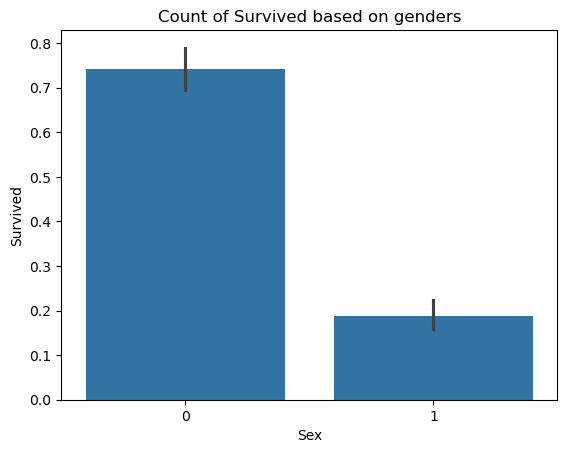

In [27]:
##exploratory data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count of Survived based on genders')
sns.barplot(x='Sex',y='Survived',data=df)


<Axes: title={'center': 'Count of Survived based on age'}, xlabel='Survived', ylabel='Age'>

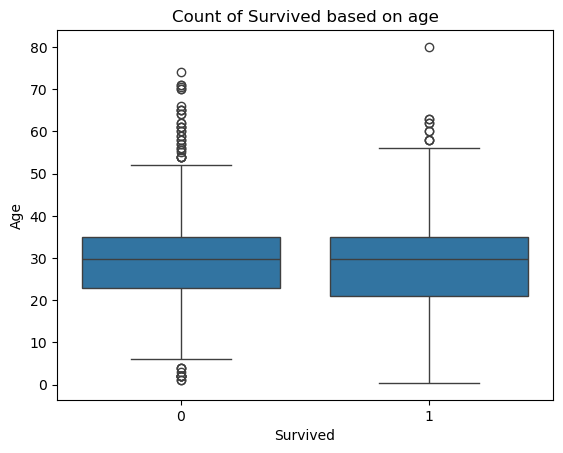

In [35]:
plt.title('Count of Survived based on age')
sns.boxplot(x='Survived',y='Age',data=df)

Text(0.5, 1.0, 'Distribution of age')

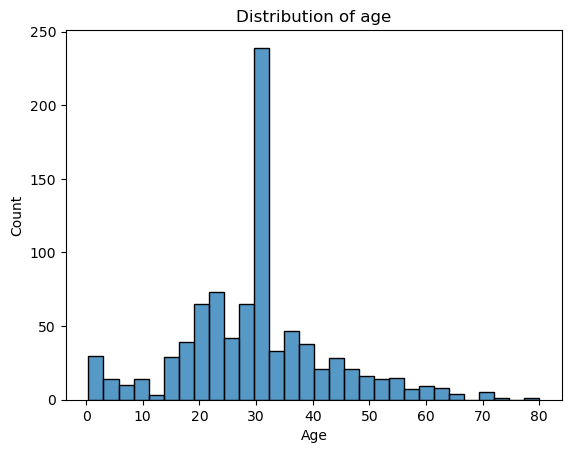

In [37]:
sns.histplot(x='Age',data=df)
plt.title('Distribution of age')

Text(0.5, 1.0, 'No of Males and Females')

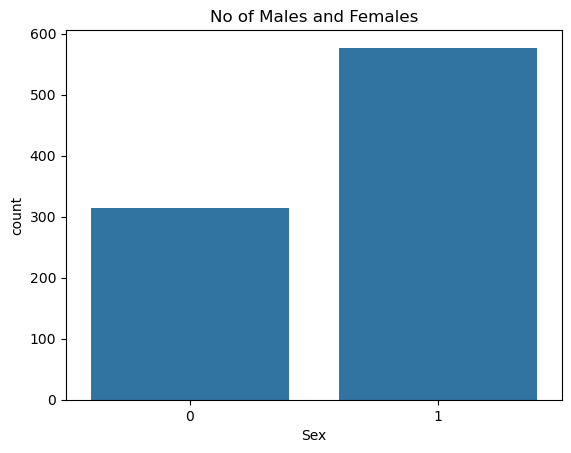

In [39]:
sns.countplot(x='Sex',data=df)
plt.title('No of Males and Females')

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [43]:
y_pred=model.predict(x_test)

In [45]:
accuracy=accuracy_score(y_pred,y_test)

In [47]:
accuracy


0.7653631284916201